In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,NaN,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,NaN,1.66010,2.35270,0.66126,3.13510,3.93810,NaN
4,NaN,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,NaN,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,NaN,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	24
float64		column 2	18
float64		column 3	30
float64		column 4	18
float64		column 5	19
float64		column 6	24
float64		column 7	19
float64		column 8	30
float64		column 9	13
float64		column 10	0
float64		column 11	18
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,376.000000,382.000000,370.000000,382.000000,381.000000,376.000000,381.000000,370.000000,387.000000,400.000000,382.000000,394.000000
mean,-0.026742,0.076739,2.067900,1.866685,1.930087,1.976235,2.048195,1.967989,1.966732,2.025384,1.959350,1.952802
std,2.485507,2.720467,1.111174,1.124273,1.148123,1.136869,1.151733,1.129478,1.138886,1.158591,1.127274,1.188128
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.636767,-0.771620,1.147550,0.934957,0.883160,1.055775,1.032600,1.022200,1.069700,1.035350,0.966943,0.912077
50%,-0.046671,0.030257,2.100500,1.758450,1.915100,2.021800,2.102400,1.979350,2.065300,2.082700,1.904550,1.914800
75%,0.737807,0.884558,2.986700,2.757075,2.929000,2.949075,2.992700,2.942050,2.915900,3.042800,2.930300,2.973425
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.994400,3.985500,3.984300,3.938100,3.996000


<AxesSubplot:>

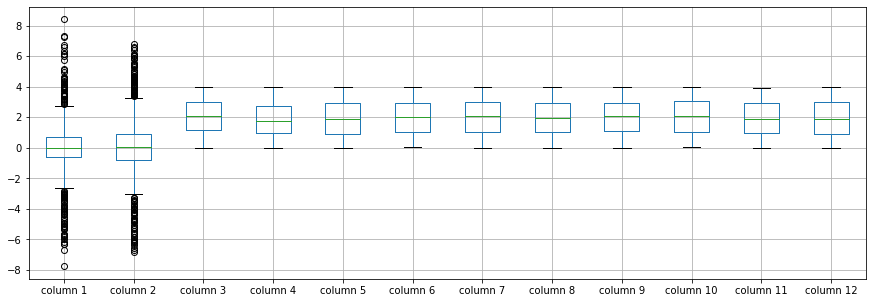

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.026742
column 2     0.076739
column 3     2.067900
column 4     1.866685
column 5     1.930087
column 6     1.976235
column 7     2.048195
column 8     1.967989
column 9     1.966732
column 10    2.025384
column 11    1.959350
column 12    1.952802
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.015145,-0.041015,-0.094597,0.014087,0.018605,-0.037198,0.042063,-0.011192,0.064095,0.062980,-0.041192
column 2,0.015145,1.000000,-0.062640,0.031593,-0.081558,-0.089418,0.022246,-0.032929,0.005434,0.013073,-0.047210,0.061210
column 3,-0.041015,-0.062640,1.000000,-0.044619,-0.041437,-0.030601,-0.085340,0.034671,0.085238,-0.020632,-0.045751,0.002744
column 4,-0.094597,0.031593,-0.044619,1.000000,-0.023879,0.071611,0.042971,0.083524,-0.013487,0.073745,-0.010102,-0.046873
column 5,0.014087,-0.081558,-0.041437,-0.023879,1.000000,0.089909,0.039800,-0.018127,0.022806,-0.002431,0.033393,-0.040073
column 6,0.018605,-0.089418,-0.030601,0.071611,0.089909,1.000000,0.012295,0.031603,0.012260,0.013129,0.019511,-0.035983
column 7,-0.037198,0.022246,-0.085340,0.042971,0.039800,0.012295,1.000000,-0.036359,0.097248,0.044625,0.043845,-0.056421
column 8,0.042063,-0.032929,0.034671,0.083524,-0.018127,0.031603,-0.036359,1.000000,0.064453,-0.119837,-0.062199,-0.030508
column 9,-0.011192,0.005434,0.085238,-0.013487,0.022806,0.012260,0.097248,0.064453,1.000000,0.001821,0.014635,0.050024
column 10,0.064095,0.013073,-0.020632,0.073745,-0.002431,0.013129,0.044625,-0.119837,0.001821,1.000000,-0.022978,0.013414


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+39,12+39+39,12+39+39+39,12+39+39+39+39,12+39+39+39+39+39,12+39+39+39+39+39+39,12+39+39+39+39+39+39+39,12+39+39+39+39+39+39,12+39+39+39+39+39,12+39+39+39+39,12+39+39+39,12+39+39,12+39,12], vae_layer = False, seed = 39)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.35363334655762
Epoch: 1 , loss: 26.322482452392578
Epoch: 2 , loss: 26.29746940612793
Epoch: 3 , loss: 25.903284072875977
Epoch: 4 , loss: 23.691572494506836
Epoch: 5 , loss: 21.781414413452147
Epoch: 6 , loss: 21.58792793273926
Epoch: 7 , loss: 21.165593566894533
Epoch: 8 , loss: 20.871807403564453
Epoch: 9 , loss: 20.677963790893553
Epoch: 10 , loss: 20.553202819824218
Epoch: 11 , loss: 20.20103828430176
Epoch: 12 , loss: 20.20213897705078
Epoch: 13 , loss: 19.845763473510743
Epoch: 14 , loss: 19.764964904785156
Epoch: 15 , loss: 19.814161987304686
Epoch: 16 , loss: 19.412653045654295
Epoch: 17 , loss: 19.30262908935547
Epoch: 18 , loss: 19.268609085083007
Epoch: 19 , loss: 19.303226394653322
Epoch: 20 , loss: 18.793883590698243
Epoch: 21 , loss: 18.746519088745117
Epoch: 22 , loss: 18.67023063659668
Epoch: 23 , loss: 18.589132843017577
Epoch: 24 , loss: 18.680965270996094
Epoch: 25 , loss: 18.316

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.038736
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.089619,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,1.757453,0.0,0.0,0.0,0.0,0.000000,-1.470019
4,0.239215,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-2.445303,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
396,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
397,3.457440,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
398,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(31.618087194193055, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.19364991245320093

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.469600,0.21541,3.09000,0.78343,0.51035,1.120049,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.277800,1.42850,0.14333,1.19480,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.210000,3.99630,2.21730,3.90290,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,2.324613,1.66010,2.35270,0.66126,3.13510,3.938100,2.264581
4,-0.029185,-1.006000,2.88220,1.56160,3.20140,3.377400,1.52260,0.98475,3.10940,3.65640,1.471897,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.354060,1.62780,3.29400,1.08500,0.15740,0.465040,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.686100,1.09510,3.79360,0.12790,0.54249,3.365800,3.755600
397,-0.021660,-1.993300,1.32480,1.77210,2.55090,1.470100,0.92540,1.84110,3.47730,0.95496,1.526300,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.410100,2.95160,0.27800,0.99059,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NN_5(imp).xlsx", index=False, header=False)